In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Conv2DTranspose, BatchNormalization, Activation, AveragePooling2D

In [2]:
# Define Convolutional Block
def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding = "same")(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    
    x = Conv2D(num_filters, 3, padding = "same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    
    return x

In [3]:
# Define Encoder
def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPooling2D((2,2))(x)
    return x, p

In [4]:
# Define Decoder
def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2,2), strides = 2, padding = "same")(input)
    x = concatenate([x, skip_features])
    x = conv_block(x, num_filters)
    return x

In [11]:
# Define Network
def build_unet(input_shape):
    inputs = Input(input_shape)


    s1, p1 = encoder_block(inputs, 32)
    s2, p2 = encoder_block(p1, 64)
    s3, p3 = encoder_block(p2, 128)
    s4, p4 = encoder_block(p3, 256)

    b1 = conv_block(p4, 512)

    d1 = decoder_block(b1, s4, 256)
    d2 = decoder_block(d1, s3, 128)
    d3 = decoder_block(d2, s2, 64)
    d4 = decoder_block(d3, s1, 32)
    
    outputs = Conv2D(1,1, padding = "same", activation = "sigmoid")(d4)
    
    model = Model(inputs, outputs, name = "U-Net")
    model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics = ['Accuracy'])
    return model

In [6]:
import tensorflow as tf
import os
from pathlib import Path
import numpy as np
from tqdm import tqdm
from skimage import color
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import random

In [7]:
# Test for GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Num GPUs Available:  1


In [8]:
# Define Training Set & Testing Set
IMG_WIDTH = 448
IMG_HEIGHT = 448
IMG_CHANNELS = 3
Train_X_dir = Path(r'C:\Users\tenso\Downloads\New Project\Set\Combined\images')
Train_Y_dir = Path(r'C:\Users\tenso\Downloads\New Project\Set\Combined\masks')
Test_X_dir = Path(r'C:\Users\tenso\Downloads\New Project\Set\Crack\sample')
Train_X_ids = next(os.walk(Train_X_dir))[2]
Train_Y_ids = next(os.walk(Train_Y_dir))[2]
Test_X_ids = next(os.walk(Test_X_dir))[2]
Train_X_path = 'Set/Combined/images/'
Train_Y_path = 'Set/Combined/masks/'
Test_X_path = 'Set/Crack/sample/'
Train_X = np.zeros((len(Train_X_ids), IMG_HEIGHT, IMG_WIDTH,3), dtype=np.uint8)
Train_Y = np.zeros((len(Train_Y_ids), IMG_HEIGHT, IMG_WIDTH,1), dtype=bool)
Test_X = np.zeros((len(Test_X_ids), IMG_HEIGHT, IMG_WIDTH,3), dtype=np.uint8)
for n, id_ in tqdm(enumerate(Train_X_ids), total=len(Train_X_ids)):
    print(id_)
    img_paths = Train_X_path + id_
    img = imread(img_paths)[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    Train_X[n] = img
    msk_paths = Train_Y_path + id_
    msk = imread(msk_paths)[:,:]
    msk = resize(msk, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    msk = np.expand_dims(msk,axis=-1)
    Train_Y[n]=msk
    

sizes_test = []
for n, id_ in tqdm(enumerate(Test_X_ids), total=len(Test_X_ids)):
    print(id_)
    img_paths = Test_X_path + id_
    img = imread(img_paths)[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    # img = color.rgb2gray(img)
    Test_X[n] = img

  1%|▊                                                                                 | 2/214 [00:00<00:10, 19.69it/s]

CFD_002.jpg
CFD_003.jpg
CFD_004.jpg
CFD_006.jpg
CFD_007.jpg


  4%|███                                                                               | 8/214 [00:00<00:09, 21.66it/s]

CFD_008.jpg
CFD_009.jpg
CFD_010.jpg
CFD_011.jpg
CFD_012.jpg


  5%|████▏                                                                            | 11/214 [00:00<00:09, 21.75it/s]

CFD_013.jpg
CFD_014.jpg
CFD_015.jpg


  7%|█████▎                                                                           | 14/214 [00:00<00:09, 21.75it/s]

CFD_016.jpg


  8%|██████▍                                                                          | 17/214 [00:00<00:09, 21.82it/s]

CFD_017.jpg
CFD_019.jpg
CFD_020.jpg
CFD_021.jpg
CFD_022.jpg


  9%|███████▌                                                                         | 20/214 [00:00<00:08, 21.70it/s]

CFD_023.jpg
CFD_024.jpg
CFD_025.jpg
CFD_026.jpg


 12%|█████████▊                                                                       | 26/214 [00:01<00:08, 21.15it/s]

CFD_027.jpg
CFD_028.jpg
CFD_029.jpg
CFD_030.jpg


 14%|██████████▉                                                                      | 29/214 [00:01<00:08, 21.23it/s]

CFD_031.jpg
CFD_032.jpg
CFD_033.jpg
CFD_034.jpg
CFD_035.jpg


 16%|█████████████▏                                                                   | 35/214 [00:01<00:08, 21.71it/s]

CFD_036.jpg
CFD_037.jpg
CFD_038.jpg
CFD_039.jpg
CFD_040.jpg


 19%|███████████████▌                                                                 | 41/214 [00:01<00:07, 21.69it/s]

CFD_041.jpg
CFD_042.jpg
CFD_043.jpg
CFD_044.jpg


 21%|████████████████▋                                                                | 44/214 [00:02<00:07, 21.89it/s]

CFD_045.jpg
CFD_046.jpg
CFD_047.jpg
CFD_048.jpg
CFD_049.jpg


 23%|██████████████████▉                                                              | 50/214 [00:02<00:07, 22.02it/s]

CFD_050.jpg
CFD_051.jpg
CFD_052.jpg
CFD_053.jpg


 25%|████████████████████                                                             | 53/214 [00:02<00:07, 21.99it/s]

CFD_054.jpg
CFD_055.jpg
CFD_056.jpg
CFD_057.jpg
CFD_058.jpg


 28%|██████████████████████▎                                                          | 59/214 [00:02<00:07, 21.63it/s]

CFD_059.jpg
CFD_060.jpg
CFD_061.jpg
CFD_062.jpg


 29%|███████████████████████▍                                                         | 62/214 [00:02<00:07, 21.67it/s]

CFD_063.jpg
CFD_064.jpg
CFD_065.jpg
CFD_066.jpg
CFD_067.jpg


 32%|█████████████████████████▋                                                       | 68/214 [00:03<00:06, 21.78it/s]

CFD_068.jpg
CFD_070.jpg
CFD_071.jpg
CFD_073.jpg


 33%|██████████████████████████▊                                                      | 71/214 [00:03<00:06, 21.79it/s]

CFD_074.jpg
CFD_075.jpg
CFD_076.jpg
CFD_077.jpg
CFD_078.jpg


 36%|█████████████████████████████▏                                                   | 77/214 [00:03<00:06, 21.99it/s]

CFD_079.jpg
CFD_080.jpg
CFD_081.jpg
CFD_082.jpg
CFD_083.jpg


 37%|██████████████████████████████▎                                                  | 80/214 [00:03<00:06, 21.97it/s]

CFD_084.jpg
CFD_085.jpg
CFD_087.jpg
CFD_088.jpg
CFD_089.jpg


 40%|████████████████████████████████▌                                                | 86/214 [00:03<00:05, 21.81it/s]

CFD_091.jpg
CFD_092.jpg
CFD_093.jpg
CFD_094.jpg
CFD_095.jpg


 43%|██████████████████████████████████▊                                              | 92/214 [00:04<00:05, 21.79it/s]

CFD_096.jpg
CFD_097.jpg
CFD_098.jpg
CFD_099.jpg
CFD_101.jpg


 44%|███████████████████████████████████▉                                             | 95/214 [00:04<00:05, 21.08it/s]

CFD_102.jpg
CFD_103.jpg
CFD_104.jpg
CFD_105.jpg
CFD_106.jpg


 47%|█████████████████████████████████████▊                                          | 101/214 [00:04<00:05, 21.53it/s]

CFD_107.jpg
CFD_108.jpg
CFD_109.jpg
CFD_110.jpg
CFD_113.jpg


 50%|████████████████████████████████████████                                        | 107/214 [00:04<00:04, 22.01it/s]

CFD_114.jpg
CFD_115.jpg
CFD_116.jpg
CFD_117.jpg


 51%|█████████████████████████████████████████                                       | 110/214 [00:05<00:04, 22.19it/s]

CRACK500_20160222_080850_1281_361.jpg
CRACK500_20160222_080850_1281_721.jpg
CRACK500_20160222_080850_1921_1.jpg
CRACK500_20160222_080850_1921_361.jpg
CRACK500_20160222_080850_1_361.jpg


 54%|███████████████████████████████████████████▎                                    | 116/214 [00:05<00:04, 22.22it/s]

CRACK500_20160222_080850_641_361.jpg
CRACK500_20160222_080850_641_721.jpg
CRACK500_20160222_080933_361_1.jpg
CRACK500_20160222_080933_361_1921.jpg
CRACK500_20160222_080933_361_641.jpg


 56%|████████████████████████████████████████████▍                                   | 119/214 [00:05<00:04, 22.15it/s]

CRACK500_20160222_080933_721_1.jpg
CRACK500_20160222_080933_721_1921.jpg
CRACK500_20160222_080933_721_641.jpg
CRACK500_20160222_081011_1281_721.jpg
CRACK500_20160222_081011_1921_721.jpg


 58%|██████████████████████████████████████████████▋                                 | 125/214 [00:05<00:04, 22.13it/s]

CRACK500_20160222_081011_1_361.jpg
CRACK500_20160222_081011_1_721.jpg
CRACK500_20160222_081011_641_361.jpg
CRACK500_20160222_081011_641_721.jpg
CRACK500_20160222_081031_1281_361.jpg


 61%|████████████████████████████████████████████████▉                               | 131/214 [00:06<00:03, 22.11it/s]

CRACK500_20160222_081031_1921_361.jpg
CRACK500_20160222_081031_1_721.jpg
CRACK500_20160222_081031_641_361.jpg
CRACK500_20160222_081031_641_721.jpg


 63%|██████████████████████████████████████████████████                              | 134/214 [00:06<00:03, 21.96it/s]

CRACK500_20160222_081102_1281_361.jpg
CRACK500_20160222_081102_1281_721.jpg
CRACK500_20160222_081102_1921_1.jpg
CRACK500_20160222_081102_1921_1081.jpg
CRACK500_20160222_081102_1921_361.jpg


 65%|████████████████████████████████████████████████████▎                           | 140/214 [00:06<00:03, 21.84it/s]

CRACK500_20160222_081102_1921_721.jpg
CRACK500_20160222_081102_1_721.jpg
CRACK500_20160222_081102_641_361.jpg
CRACK500_20160222_081102_641_721.jpg
CRACK500_20160222_081111_1281_361.jpg


 67%|█████████████████████████████████████████████████████▍                          | 143/214 [00:06<00:03, 21.95it/s]

CRACK500_20160222_081111_1281_721.jpg
CRACK500_20160222_081111_1921_721.jpg
CRACK500_20160222_081111_1_1.jpg
CRACK500_20160222_081111_1_361.jpg
CRACK500_20160222_081111_641_361.jpg


 70%|███████████████████████████████████████████████████████▋                        | 149/214 [00:06<00:02, 21.80it/s]

CRACK500_20160222_081113_1281_361.jpg
CRACK500_20160222_081113_1281_721.jpg
CRACK500_20160222_081113_1921_721.jpg
CRACK500_20160222_081113_1_361.jpg
CRACK500_20160222_081113_1_721.jpg


 72%|█████████████████████████████████████████████████████████▉                      | 155/214 [00:07<00:02, 21.88it/s]

CRACK500_20160222_081113_641_361.jpg
CRACK500_20160222_081113_641_721.jpg
CRACK500_20160222_081839_1281_1.jpg
CRACK500_20160222_081839_1281_1081.jpg
CRACK500_20160222_081839_1281_361.jpg


 74%|███████████████████████████████████████████████████████████                     | 158/214 [00:07<00:02, 21.81it/s]

CRACK500_20160222_081839_1281_721.jpg
CRACK500_20160222_081839_1921_361.jpg
CRACK500_20160222_081839_641_721.jpg
CRACK500_20160222_081908_1281_1.jpg
CRACK500_20160222_081908_1281_1081.jpg


 77%|█████████████████████████████████████████████████████████████▎                  | 164/214 [00:07<00:02, 21.92it/s]

CRACK500_20160222_081908_1281_721.jpg
CRACK500_20160222_081908_1_1.jpg
CRACK500_20160222_081908_1_1081.jpg
CRACK500_20160222_081908_1_361.jpg
CRACK500_20160222_081908_1_721.jpg


 79%|███████████████████████████████████████████████████████████████▌                | 170/214 [00:07<00:02, 21.77it/s]

CRACK500_20160222_081908_641_361.jpg
CRACK500_20160222_081908_641_721.jpg
CRACK500_20160222_082414_1281_1081.jpg
CRACK500_20160222_082414_1281_361.jpg
CRACK500_20160222_082414_1_361.jpg


 81%|████████████████████████████████████████████████████████████████▋               | 173/214 [00:07<00:01, 21.83it/s]

CRACK500_20160222_082414_641_361.jpg
CRACK500_20160222_114759_1281_1.jpg
CRACK500_20160222_114759_1281_721.jpg
CRACK500_20160222_114759_1921_1.jpg
CRACK500_20160222_114759_1921_1081.jpg


 84%|██████████████████████████████████████████████████████████████████▉             | 179/214 [00:08<00:01, 22.02it/s]

CRACK500_20160222_114759_1921_361.jpg
CRACK500_20160222_114759_1921_721.jpg
CRACK500_20160222_114759_1_1081.jpg
CRACK500_20160222_114759_1_361.jpg
CRACK500_20160222_114759_1_721.jpg


 86%|█████████████████████████████████████████████████████████████████████▏          | 185/214 [00:08<00:01, 22.12it/s]

CRACK500_20160222_114759_641_1.jpg
CRACK500_20160222_114759_641_1081.jpg
CRACK500_20160222_114759_641_361.jpg
CRACK500_20160222_114806_1281_1.jpg


 88%|██████████████████████████████████████████████████████████████████████▎         | 188/214 [00:08<00:01, 21.92it/s]

CRACK500_20160222_114806_1281_1081.jpg
CRACK500_20160222_114806_1281_361.jpg
CRACK500_20160222_114806_1281_721.jpg
CRACK500_20160222_115219_1281_361.jpg
CRACK500_20160222_115219_1281_721.jpg


 91%|████████████████████████████████████████████████████████████████████████▌       | 194/214 [00:08<00:00, 22.07it/s]

CRACK500_20160222_115219_1921_1081.jpg
CRACK500_20160222_115219_641_361.jpg
CRACK500_20160222_115224_1281_1.jpg
CRACK500_20160222_115224_1281_721.jpg
CRACK500_20160222_115224_1921_1081.jpg


 92%|█████████████████████████████████████████████████████████████████████████▋      | 197/214 [00:09<00:00, 21.88it/s]

CRACK500_20160222_115224_641_1.jpg
CRACK500_20160222_115224_641_1081.jpg
CRACK500_20160222_115224_641_361.jpg
CRACK500_20160222_115233_1281_361.jpg
CRACK500_20160222_115233_1281_721.jpg


 95%|███████████████████████████████████████████████████████████████████████████▉    | 203/214 [00:09<00:00, 21.99it/s]

CRACK500_20160222_115233_1_721.jpg
CRACK500_20160222_115233_641_361.jpg
CRACK500_20160222_115305_1281_1081.jpg
CRACK500_20160222_115305_1921_1081.jpg
CRACK500_20160222_115305_1921_361.jpg


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 209/214 [00:09<00:00, 21.90it/s]

CRACK500_20160222_115305_641_1.jpg
CRACK500_20160222_115305_641_1081.jpg
CRACK500_20160222_115305_641_361.jpg
CRACK500_20160222_115305_641_721.jpg


 99%|███████████████████████████████████████████████████████████████████████████████▎| 212/214 [00:09<00:00, 22.07it/s]

CRACK500_20160222_115324_1281_1.jpg
CRACK500_20160222_115324_1281_361.jpg
CRACK500_20160222_115324_1_1.jpg
CRACK500_20160222_115324_641_1081.jpg
CRACK500_20160222_115324_641_721.jpg


 23%|███████████████████▏                                                               | 3/13 [00:00<00:00, 27.12it/s]

CFD_001.jpg
CFD_005.jpg
CFD_018.jpg
CFD_069.jpg
CFD_111.jpg
CFD_112.jpg


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [00:00<00:00, 26.51it/s]

CRACK500_20160222_080850_1_361.jpg
CRACK500_20160222_080850_641_721.jpg
CRACK500_20160222_115219_641_1.jpg
CRACK500_20160222_115224_1281_361.jpg
CRACK500_20160222_163940_641_1.jpg
CRACK500_20160222_163940_641_1081.jpg


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 26.24it/s]

RGB2.jpg


In [9]:
input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [12]:
# Compile Model
model = build_unet(input_shape)
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics = ['Accuracy'])

In [13]:
model.summary()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 448, 448, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 448, 448, 32  896         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 448, 448, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

                                                                                                  
 conv2d_8 (Conv2D)              (None, 28, 28, 512)  1180160     ['max_pooling2d_3[0][0]']        
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 28, 28, 512)  2048       ['conv2d_8[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_8 (Activation)      (None, 28, 28, 512)  0           ['batch_normalization_8[0][0]']  
                                                                                                  
 conv2d_9 (Conv2D)              (None, 28, 28, 512)  2359808     ['activation_8[0][0]']           
                                                                                                  
 batch_nor

 conv2d_transpose_3 (Conv2DTran  (None, 448, 448, 32  8224       ['activation_15[0][0]']          
 spose)                         )                                                                 
                                                                                                  
 concatenate_3 (Concatenate)    (None, 448, 448, 64  0           ['conv2d_transpose_3[0][0]',     
                                )                                 'activation_1[0][0]']           
                                                                                                  
 conv2d_16 (Conv2D)             (None, 448, 448, 32  18464       ['concatenate_3[0][0]']          
                                )                                                                 
                                                                                                  
 batch_normalization_16 (BatchN  (None, 448, 448, 32  128        ['conv2d_16[0][0]']              
 ormalizat

In [15]:
# Train
checkpointer = tf.keras.callbacks.ModelCheckpoint('crack_seg.h5', verbose=1, save_best_only=True)
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=9),
            tf.keras.callbacks.TensorBoard(log_dir='logs')]
result = model.fit(Train_X,Train_Y, validation_split=0.1, batch_size=4, epochs=100, callbacks=callbacks)

Epoch 1/100
48/48 [==============================] - 9s 181ms/step - loss: 0.0456 - Accuracy: 0.9803 - val_loss: 0.0411 - val_Accuracy: 0.9831
Epoch 2/100
48/48 [==============================] - 9s 180ms/step - loss: 0.0430 - Accuracy: 0.9812 - val_loss: 0.0448 - val_Accuracy: 0.9822
Epoch 3/100
48/48 [==============================] - 9s 180ms/step - loss: 0.0427 - Accuracy: 0.9812 - val_loss: 0.0437 - val_Accuracy: 0.9831
Epoch 4/100
48/48 [==============================] - 9s 181ms/step - loss: 0.0408 - Accuracy: 0.9818 - val_loss: 0.0441 - val_Accuracy: 0.9828
Epoch 5/100
48/48 [==============================] - 9s 180ms/step - loss: 0.0405 - Accuracy: 0.9819 - val_loss: 0.0474 - val_Accuracy: 0.9828
Epoch 6/100
48/48 [==============================] - 9s 180ms/step - loss: 0.0404 - Accuracy: 0.9818 - val_loss: 0.0406 - val_Accuracy: 0.9838
Epoch 7/100
48/48 [==============================] - 9s 181ms/step - loss: 0.0396 - Accuracy: 0.9820 - val_loss: 0.0464 - val_Accuracy: 0.9829

In [150]:
# Predict
preds_test = model.predict(Test_X, verbose=1)

1/1 [==============================] - 0s 24ms/step


In [125]:
# Step Function (not necessary)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

In [151]:
a=0

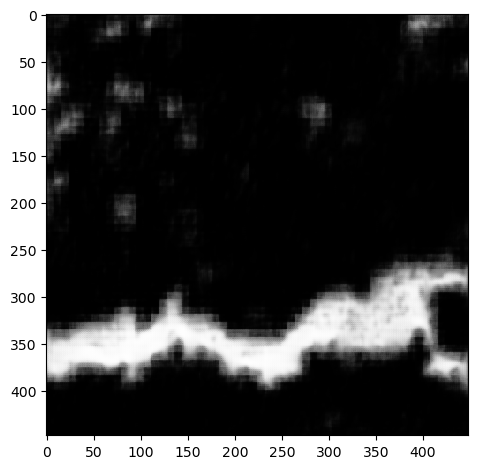

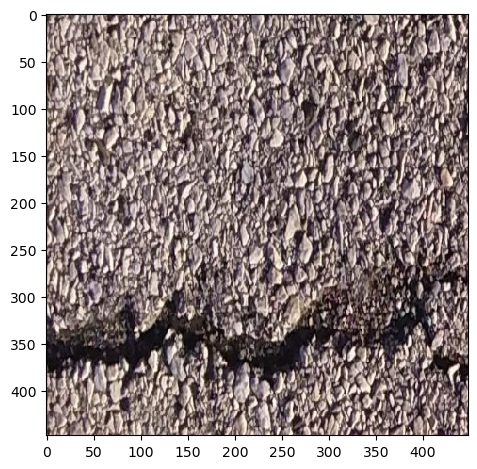

In [159]:
# Show Result
imshow(preds_test[a])
plt.show()
imshow(Test_X[a])
a=a+1

In [16]:
# Test for Other Sets
Test_P_dir = Path(r'C:\Users\tenso\Downloads\New Project\Set\Crack\sample')
Test_P_ids = next(os.walk(Test_P_dir))[2]
Test_P_path = 'Set/Crack/sample/'
Test_P = np.zeros((len(Test_P_ids), IMG_HEIGHT, IMG_WIDTH,3), dtype=np.uint8)

sizes_test = []
for n, id_ in tqdm(enumerate(Test_P_ids), total=len(Test_P_ids)):
    print(id_)
    img_paths = Test_P_path + id_
    img = imread(img_paths)[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    # img = color.rgb2gray(img)
    Test_P[n] = img

 38%|███████████████████████████████▉                                                   | 5/13 [00:00<00:00, 23.91it/s]

CFD_001.jpg
CFD_005.jpg
CFD_018.jpg
CFD_069.jpg
CFD_111.jpg


 62%|███████████████████████████████████████████████████                                | 8/13 [00:00<00:00, 25.21it/s]

CFD_112.jpg
CRACK500_20160222_080850_1_361.jpg
CRACK500_20160222_080850_641_721.jpg
CRACK500_20160222_115219_641_1.jpg
CRACK500_20160222_115224_1281_361.jpg
CRACK500_20160222_163940_641_1.jpg


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 25.18it/s]

CRACK500_20160222_163940_641_1081.jpg
RGB2.jpg


In [17]:
preds_test_P = model.predict(Test_P, verbose=1)

1/1 [==============================] - 3s 3s/step


In [18]:
a=0

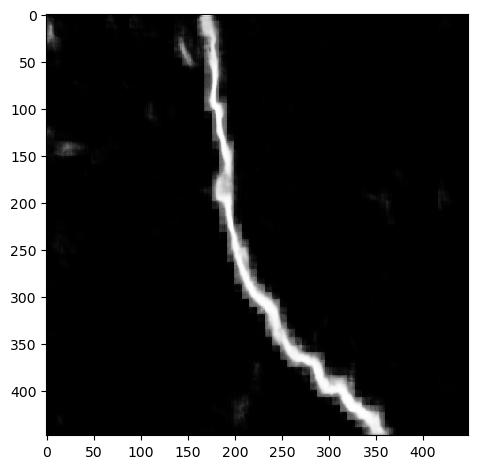

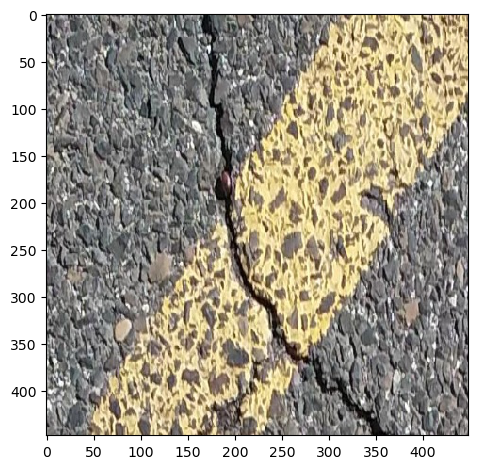

In [27]:
imshow(preds_test_P[a])
plt.show()
imshow(Test_P[a])
a=a+1